# Mining Software Repositories: OpenStack Nova Project.

### Goal

The goal of this tool and analysis is to help in capturing insights from the commits on a project repo, in this case: the openstack nova project repo. This will help in understanding the project as well as provide guidiance to contributors and maintainers.

### Objectives

The following questions will be answered:
* Find the most actively modified module?
* How many commits occured during the studied period?
* How much churn occurred during the studied period? Churn is defined as the sum of added and removed lines by all commits.

**NB**: This workflow is responsible for the pre-processing, analysis, and generation of insight from the collected data. It is assumed that the automated collection of the data via the script accessible in thesame folder with this notebook has been completed. The collected data will be loaded here before the other process in the workflow executes.

### Required imports:

In [1]:
# Built-in libraries
import json
import os

# The normal data science ecosystem libraries
# pandas for data wrangling
import pandas as pd

# Plotting modules and libraries required
import matplotlib as mpl
import matplotlib.pyplot as plt

### Required settings:

In [2]:
# Settings:
# 1. Command needed to make plots appear in the Jupyter Notebook
%matplotlib inline

# 2. Command needed to make plots bigger in the Jupyter Notebook
plt.rcParams['figure.figsize']= (12, 10)

# 3. Command needed to make 'ggplot' styled plots- professional and yet good looking theme.
plt.style.use('ggplot')

# 4. This will make the plot zoomable
# mpld3.enable_notebook()

### Other utility functions for data manipulation

In [3]:
# Utility data manipulation functions

# 1. Extract path parameters from filename
def path_parameters(dframe):
     filename = os.path.basename(dframe["filename"])
     filetype = os.path.splitext(dframe["filename"])[1]
     directory = os.path.dirname(dframe["filename"])
     
     return directory, filename, filetype

### 1. Loading the data

In [4]:
# Open and load json file
with open('data.json', encoding="utf8") as file:
    data = json.load(file)
    print("data loaded successfully")

data loaded successfully


### Data normalization

The collected commit data is a semi-structured json which has nested data similar to the image below. Files is a list of file objects. The loaded data will be normalized into a flat table using pandas.json_normalize.


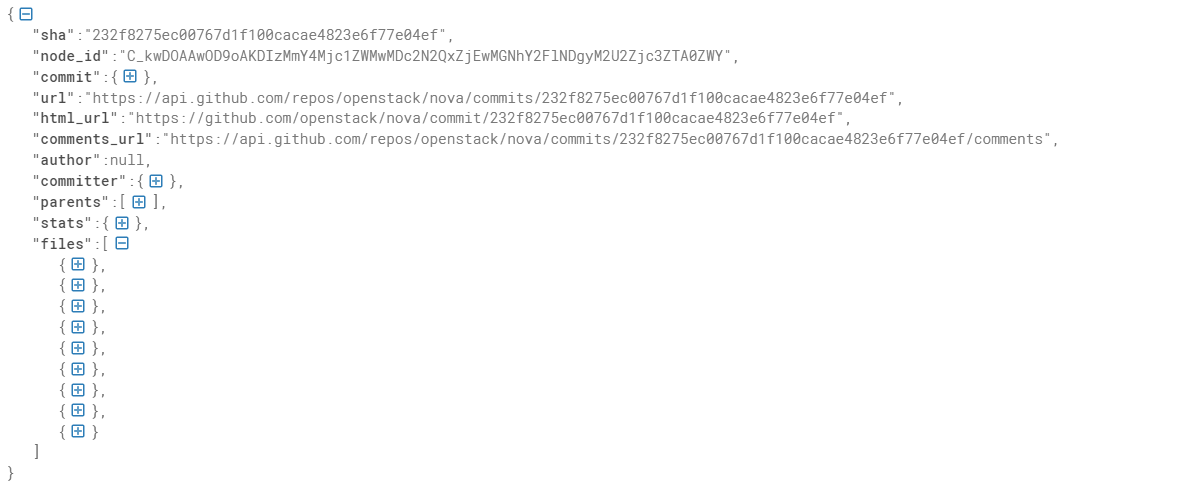

In [5]:
df = pd.json_normalize(data, "files", ["commit_node_id", "commit_sha", "commit_html_url", "commit_date" ])

### 2. Displaying current state of the data

In [6]:
# The first 5 rows
df.head()

,sha,filename,status,additions,deletions,changes,blob_url,raw_url,contents_url,patch,previous_filename,commit_node_id,commit_sha,commit_html_url,commit_date
0,08006e2b92a44b709b3ef6171cfb9a95519c8f5e,nova/compute/api.py,modified,18,4,22,https://github.com/openstack/nova/blob/3a14c1a...,https://github.com/openstack/nova/raw/3a14c1a4...,https://api.github.com/repos/openstack/nova/co...,"@@ -4822,10 +4822,24 @@ def _attach_volume(sel...",NaN,C_kwDOAAwOD9oAKDNhMTRjMWE0Mjc3YTlmNDRiNjdlMDgw...,3a14c1a4277a9f44b67e080138b28b680e5e6824,https://github.com/openstack/nova/commit/3a14c...,2022-02-14T12:37:58Z
1,79a62da21a6d4e768b48f8be3c44e39b9bcd3a83,nova/tests/unit/compute/test_api.py,modified,30,0,30,https://github.com/openstack/nova/blob/3a14c1a...,https://github.com/openstack/nova/raw/3a14c1a4...,https://api.github.com/repos/openstack/nova/co...,"@@ -524,6 +524,36 @@ def test_tagged_volume_at...",NaN,C_kwDOAAwOD9oAKDNhMTRjMWE0Mjc3YTlmNDRiNjdlMDgw...,3a14c1a4277a9f44b67e080138b28b680e5e6824,https://github.com/openstack/nova/commit/3a14c...,2022-02-14T12:37:58Z
2,ef5582543a2ac953179e5dbc3e493e69c9bc84bf,releasenotes/notes/bug-1960401-504eb255253d966...,added,8,0,8,https://github.com/openstack/nova/blob/3a14c1a...,https://github.com/openstack/nova/raw/3a14c1a4...,https://api.github.com/repos/openstack/nova/co...,"@@ -0,0 +1,8 @@\n+---\n+fixes:\n+ - |\n+ T...",NaN,C_kwDOAAwOD9oAKDNhMTRjMWE0Mjc3YTlmNDRiNjdlMDgw...,3a14c1a4277a9f44b67e080138b28b680e5e6824,https://github.com/openstack/nova/commit/3a14c...,2022-02-14T12:37:58Z
3,b3f461cca42b3bc413767649e7284db3c7332f42,nova/api/openstack/compute/deferred_delete.py,modified,1,1,2,https://github.com/openstack/nova/blob/232f827...,https://github.com/openstack/nova/raw/232f8275...,https://api.github.com/repos/openstack/nova/co...,"@@ -40,7 +40,7 @@ def _restore(self, req, id, ...",NaN,C_kwDOAAwOD9oAKDIzMmY4Mjc1ZWMwMDc2N2QxZjEwMGNh...,232f8275ec00767d1f100cacae4823e6f77e04ef,https://github.com/openstack/nova/commit/232f8...,2022-02-10T19:43:54Z
4,59b9c384df60d670f526f91ffb10fa09d12ab7ba,nova/api/openstack/compute/migrate_server.py,modified,1,1,2,https://github.com/openstack/nova/blob/232f827...,https://github.com/openstack/nova/raw/232f8275...,https://api.github.com/repos/openstack/nova/co...,"@@ -57,7 +57,7 @@ def _migrate(self, req, id, ...",NaN,C_kwDOAAwOD9oAKDIzMmY4Mjc1ZWMwMDc2N2QxZjEwMGNh...,232f8275ec00767d1f100cacae4823e6f77e04ef,https://github.com/openstack/nova/commit/232f8...,2022-02-10T19:43:54Z


In [7]:
# The last five rows
df.tail()

,sha,filename,status,additions,deletions,changes,blob_url,raw_url,contents_url,patch,previous_filename,commit_node_id,commit_sha,commit_html_url,commit_date
337,0ceb3b4b8fe2ee0d0d56daeeed7c8f1795e23a9b,nova/image/glance.py,modified,11,9,20,https://github.com/openstack/nova/blob/3d411ca...,https://github.com/openstack/nova/raw/3d411cad...,https://api.github.com/repos/openstack/nova/co...,"@@ -419,17 +419,17 @@ def _verify_and_write(se...",NaN,C_kwDOAAwOD9oAKDNkNDExY2FkNjAzMWI3NmEwMzNmMWUz...,3d411cad6031b76a033f1e3aeb029959cc865e36,https://github.com/openstack/nova/commit/3d411...,2022-01-17T10:31:21Z
338,4f35f060e414432c3ce8ebe9ff7761db42b5d5cb,nova/tests/unit/image/test_glance.py,modified,37,5,42,https://github.com/openstack/nova/blob/3d411ca...,https://github.com/openstack/nova/raw/3d411cad...,https://api.github.com/repos/openstack/nova/co...,"@@ -16,12 +16,14 @@\n \n import copy\n import ...",NaN,C_kwDOAAwOD9oAKDNkNDExY2FkNjAzMWI3NmEwMzNmMWUz...,3d411cad6031b76a033f1e3aeb029959cc865e36,https://github.com/openstack/nova/commit/3d411...,2022-01-17T10:31:21Z
339,c0f25bd260bba16268b56431a1137265332a2b7f,nova/exception.py,modified,3,2,5,https://github.com/openstack/nova/blob/24e02f1...,https://github.com/openstack/nova/raw/24e02f1a...,https://api.github.com/repos/openstack/nova/co...,"@@ -2362,8 +2362,9 @@ class AcceleratorRequest...",NaN,C_kwDOAAwOD9oAKDI0ZTAyZjFhOWNhZjNjZmJjNGRlYjg2...,24e02f1a9caf3cfbc4deb86066a05e1b60043446,https://github.com/openstack/nova/commit/24e02...,2022-01-17T04:25:51Z
340,95f468abb47da61117bffb720b1eab2814b7d280,requirements.txt,modified,1,0,1,https://github.com/openstack/nova/blob/33bc5c0...,https://github.com/openstack/nova/raw/33bc5c09...,https://api.github.com/repos/openstack/nova/co...,"@@ -68,3 +68,4 @@ futurist>=1.8.0 # Apache-2.0...",NaN,C_kwDOAAwOD9oAKDMzYmM1YzA5ZjU3NjY4MGQxNTA0MzVm...,33bc5c09f576680d150435fb7ad435b23e778316,https://github.com/openstack/nova/commit/33bc5...,2022-01-16T14:30:41Z
341,80104c298f80a5dd4ec1acc7a40f8b13b41ea529,test-requirements.txt,modified,0,1,1,https://github.com/openstack/nova/blob/33bc5c0...,https://github.com/openstack/nova/raw/33bc5c09...,https://api.github.com/repos/openstack/nova/co...,"@@ -7,7 +7,6 @@ mypy>=0.761 # MIT\n types-para...",NaN,C_kwDOAAwOD9oAKDMzYmM1YzA5ZjU3NjY4MGQxNTA0MzVm...,33bc5c09f576680d150435fb7ad435b23e778316,https://github.com/openstack/nova/commit/33bc5...,2022-01-16T14:30:41Z


In [8]:
# Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sha                342 non-null    object
 1   filename           342 non-null    object
 2   status             342 non-null    object
 3   additions          342 non-null    int64 
 4   deletions          342 non-null    int64 
 5   changes            342 non-null    int64 
 6   blob_url           342 non-null    object
 7   raw_url            342 non-null    object
 8   contents_url       342 non-null    object
 9   patch              342 non-null    object
 10  previous_filename  1 non-null      object
 11  commit_node_id     342 non-null    object
 12  commit_sha         342 non-null    object
 13  commit_html_url    342 non-null    object
 14  commit_date        342 non-null    object
dtypes: int64(3), object(12)
memory usage: 40.2+ KB


### 3. Data cleaning

In [9]:
# Removing columns not needed for the analysis
columns = ['previous_filename', 'patch', 'contents_url', 'raw_url', 'previous_filename', 'commit_node_id']
df.drop(columns, inplace=True, axis=1)

In [10]:
# Generating and adding extra columns
df[["directory", "file_name", "file_type"]] = df.apply(lambda x: path_parameters(x), axis=1, result_type="expand")

In [11]:
# Delete the previous filename column as it is no longer required
df.drop("filename", inplace=True, axis=1)

In [12]:
# Rename columns
df.rename(columns={"sha": "file_sha", "status": "file_status", "additions":"no_of_additions", "deletions": "no_of_deletions"}, inplace=True)

In [13]:
# Optimising the data frame by correcting the data types. 
# This will also make more operations possible on the data frame

df = df.astype({'file_sha': 'str', 'file_status': 'category', 'no_of_additions':'int', 'no_of_deletions':'int', 'changes':'int', 'blob_url':'str', 'commit_sha':'str', 'commit_html_url':'str', 'commit_date':'str', 'directory':'str', 'file_name':'str', 'file_type':'category'})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   file_sha         342 non-null    object  
 1   file_status      342 non-null    category
 2   no_of_additions  342 non-null    int32   
 3   no_of_deletions  342 non-null    int32   
 4   changes          342 non-null    int32   
 5   blob_url         342 non-null    object  
 6   commit_sha       342 non-null    object  
 7   commit_html_url  342 non-null    object  
 8   commit_date      342 non-null    object  
 9   directory        342 non-null    object  
 10  file_name        342 non-null    object  
 11  file_type        342 non-null    category
dtypes: category(2), int32(3), object(7)
memory usage: 24.1+ KB


### Basic Analysis and Visualization

#### 1. Total number of commits that occured during the studied period.

In [15]:
# value_counts returns a series object counting all unique values with the 1st value being the most frequently occuring
df["commit_sha"].value_counts()

ffb810e2ba2fdec9b2a881a88fa6d65cd32f8fa3    15
0620678344d0f032a33e952d4d0fa653741f09e7    15
f7fa3bf5fcfc39f8ac9dcfa126747e376d801eb5    14
d1e9ecb443dd6bd5dc6456a3f9e33c1551436364    13
d99c15f4f12d713d47f54626769477c4129fec5b    13
                                            ..
ded6168ad729e747fc976ca3cdb8baf971fbc31a     1
2aa1ed5810b67b9a8f18b2ec5e21004f93831168     1
55566b90aaf33a959e73e69cf9c75ff86bfba4b2     1
cc794b3641b0b8ccbdee0d39149f59ed40dc803f     1
a656748cf9dc441d79bde120785904ff2626646d     1
Name: commit_sha, Length: 74, dtype: int64

In [16]:
print("The total no. of processed commits is: {commits_total}".format(commits_total = len(df["commit_sha"].value_counts())))

The total no. of processed commits is: 74


#### 2. The 12 most actively modified modules 

Text(0, 0.5, 'Cities')

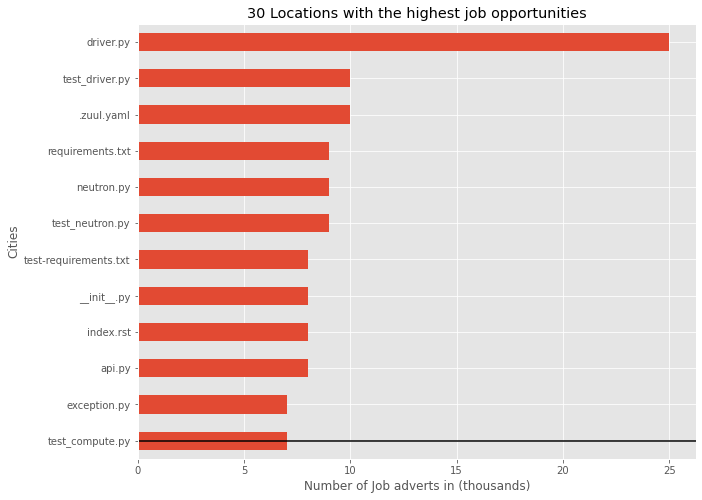

In [17]:
df["file_name"].value_counts().head(12).sort_values().plot.barh(figsize=(10, 8)); plt.axhline(0, color='k'); plt.title('30 Locations with the highest job opportunities'); plt.xlabel('Number of Job adverts in (thousands)'); plt.ylabel('Cities')

In [18]:
df["file_name"].value_counts().head(12)

driver.py                25
.zuul.yaml               10
test_driver.py           10
test_neutron.py           9
neutron.py                9
requirements.txt          9
api.py                    8
index.rst                 8
__init__.py               8
test-requirements.txt     8
test_compute.py           7
exception.py              7
Name: file_name, dtype: int64

In [19]:
df["directory"].value_counts().head(12)

                                36
nova/virt/libvirt               21
nova/tests/unit/virt/libvirt    18
doc/source/admin                17
nova/tests/unit/compute         16
nova/pci                        16
nova/network                    16
releasenotes/notes              15
nova/tests/unit/network         13
nova/api/openstack/compute      13
nova/compute                    12
nova                            12
Name: directory, dtype: int64

In [20]:
df["file_type"].value_counts()

.py      256
.rst      31
.yaml     25
.txt      24
           2
.cfg       2
.ini       2
Name: file_type, dtype: int64

In [21]:
df["changes"].value_counts()

2      38
1      33
8      28
4      18
6      17
       ..
44      1
63      1
47      1
178     1
42      1
Name: changes, Length: 67, dtype: int64

In [22]:
df["changes"].sum()

11374